## Overview

This dataset contains data on Airbnb locations in New York City. It details all sorts of interesting information like the name of the posting, what neighborhood it's in, price, reviews per month, and bunch of other stuff.

So let's get into it!

### Data Overview

Let's see what the data looks like

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read in data
data = pd.read_csv("/Users/danielluo/data/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [7]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
data.shape

(48895, 16)

Looks like each row is a different property in NYC. It spreads among five boroughs of NYC like Manhattan, Brooklyn, Queens and then it's broken into neighborhoods within that. It also has latitude and longitude.

Each location has characteristics like price, minimum nights, number of reviews, date of last review, reviews per month, host listings, and availability.

There are a total of 48,895 different postings in NYC

## Processing Data

### Dealing with Missing Data
Let's see what missing data we have, and see if there are trends with NA data

In [9]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Reviews per month has a lot of NAs. These are likely postings that have no reviews so far. This accounts for a quarter of them so you may need to deal with them separately.

Some of them also have no name, which I'll deal with when I look into the titles of the postings. Otherwise, the data is pretty clean, not much missing data which is nice.

### Strange Observations

Interestingly there are some properties that require 365 nights, meaning booking for a whole year. The highest is 1250, which is like 3.42 years.

There are some properties that also cost $10,000 which is insane, but I guess it's New York...

I'll keep these things in mind when I do analysis later on. For now, I won't outright assume these aren't mistakes since they are possible values.

In [10]:
data.sort_values('price')[-10:]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


### High Level Goals and Product Strategy

So what kind of insights can be drawn from this data that would be useful?

Airbnb operates by taking a cut of from both the booker and the host. They take typically 6-12% of what's paid by the booker and 3% from the host for every booking that is completed. The majority of Airbnb's revenue comes from this. **This simply means that growth comes from more people booking stays on the platform and that the more expensive a stay is, the more money Airbnb can make.**

### Overview of Ideas

Since Airbnb's revenue comes from 1) # of bookings and 2) price of bookings I would want to look into what trends exist with these metrics. Are there certain types of properties that are more profitable? Are there certain types of properties that are more popular? Can we find which properties are "underrated" or "overpriced"? 

Knowing this type of information can potentially created targetted messages towards hosts that can help them improve the success of their property, maybe suggesting higher prices if they're "underrated" or by suggesting more amenities if they're "overpriced".

### Metrics of Interest

I'll look at the price variable to measure price (unsurprisingly) and I'll look at number of reviews, and reviews_per_month to gauge popularity.

#### Correlations

In [11]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.291828,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.296417,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0101416,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.145948,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0306083,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.121702,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.549868,-0.0723761,0.172028
reviews_per_month,0.291828,0.296417,-0.0101416,0.145948,-0.0306083,-0.121702,0.549868,1,-0.00942116,0.185791
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.00942116,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.185791,0.225701,1


As we can see there is a fairly weak correlation between price and all other variables. The highest correlation coefficient is availability_365 at 0.08, which likely isn't significant.

There is also only fairly weak correlations between reviews and all other variables. Again, availability 365 has a coefficient of 0.17, which is higher but not signficant still. There is also a fairly strong relationship between reviews per month and number of reviews, which is unsurprising. 

Correlations only tend to indicate linear relationships so there aren't many meaningful strong linear relationships with price/popularity with other variables.

## Price Analysis

Let's visualize some of the relationships between these variables

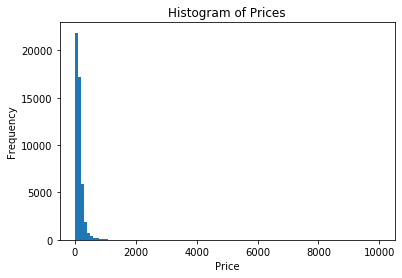

In [12]:
plt.hist(data['price'], bins=100)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [78]:
print(data['price'].mean())
print(data['price'].median())

152.7206871868289
106.0


Prices are heavily right skewed. The average price is $152 a night, but there are plenty of properties cheaper than that.

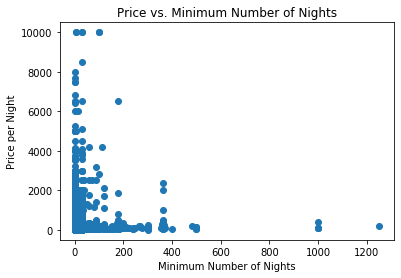

In [13]:
plt.scatter(data['minimum_nights'],data['price'])
plt.title('Price vs. Minimum Number of Nights')
plt.ylabel("Price per Night")
plt.xlabel("Minimum Number of Nights")
plt.show()

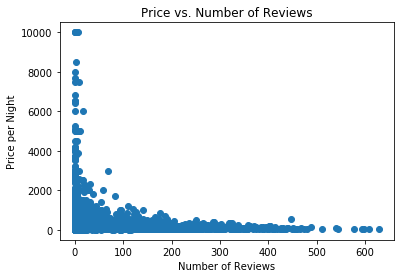

In [14]:
plt.scatter(data['number_of_reviews'], data['price'])
plt.title('Price vs. Number of Reviews')
plt.ylabel("Price per Night")
plt.xlabel("Number of Reviews")
plt.show()

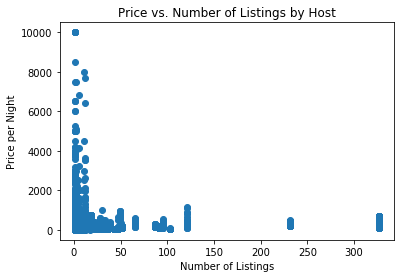

In [15]:
plt.scatter(data['calculated_host_listings_count'], data['price'])
plt.title('Price vs. Number of Listings by Host')
plt.ylabel("Price per Night")
plt.xlabel("Number of Listings")
plt.show()

Why are there these vertical lines? I think these are probably the same host that has a ton of listings, meaning the number_of_listings variables is the same for all these properties.

In [16]:
data.sort_values('calculated_host_listings_count')[-5:]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
41466,32240873,Sonder | Stock Exchange | Classic Studio + Lounge,219517861,Sonder (NYC),Manhattan,Financial District,40.70796,-74.01206,Entire home/apt,196,2,9,2019-06-18,2.48,327,318
41467,32240896,Sonder | Stock Exchange | Premier 2BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Financial District,40.70751,-74.01066,Entire home/apt,380,2,12,2019-06-20,3.50,327,302
41468,32240933,Sonder | Stock Exchange | Lively 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70726,-74.01060,Entire home/apt,229,2,2,2019-06-23,0.77,327,351
41470,32240970,Sonder | Stock Exchange | Dashing 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70584,-74.01039,Entire home/apt,215,2,3,2019-06-13,0.77,327,317
41445,32239640,Sonder | Stock Exchange | Tasteful 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70632,-74.01160,Entire home/apt,468,2,11,2019-06-21,3.00,327,267


As expected, these are all the same host so my theory is confirmed.

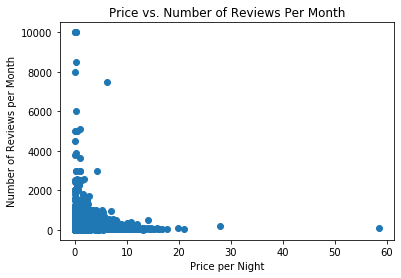

In [17]:
plt.scatter(data['reviews_per_month'], data['price'])
plt.title('Price vs. Number of Reviews Per Month')
plt.xlabel("Price per Night")
plt.ylabel("Number of Reviews per Month")
plt.show()

In essence, we can see that the prices are right skewed, meaning the large majority are on the cheaper end and then very few are very expensive. Also, the ones that are more popular with more reviews are also typically cheaper. This makes sense, cheaper listings tend to get more traffic.

In [18]:
data.groupby('neighbourhood_group').mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937
Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284


In [19]:
data.groupby('neighbourhood_group').count()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


Manhattan is the most expensive by a decently large margin, but also the least number of reviews. Potentially many listings in Manhattan don't get stayed in.

Text(0.5, 1.0, 'Price Distribution by Neighbourhood')

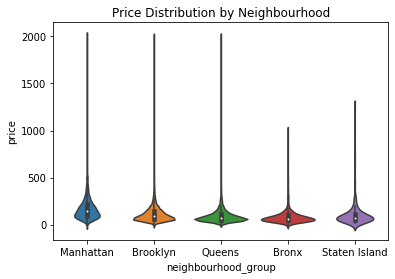

In [20]:
# let's take away the top 50 most expensive
# These are outliers and taking them out will allow for better visualization

neighbourhood_order = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

trimmed_price = data.sort_values('price')[:-100]

ax = sns.violinplot(x="neighbourhood_group", y="price", data=trimmed_price, order = neighbourhood_order)
ax.set_title("Price Distribution by Neighbourhood")
# this is not helpful because of huge outliers

Looks like Manhattan tends to be the most expensive with the highest variance, whereas Brooklyn, Queens, Bronx are less expensive with lower variance. In Manhattan, prices tend to be more spread, while in the rest, they're more tight and on the cheaper end.

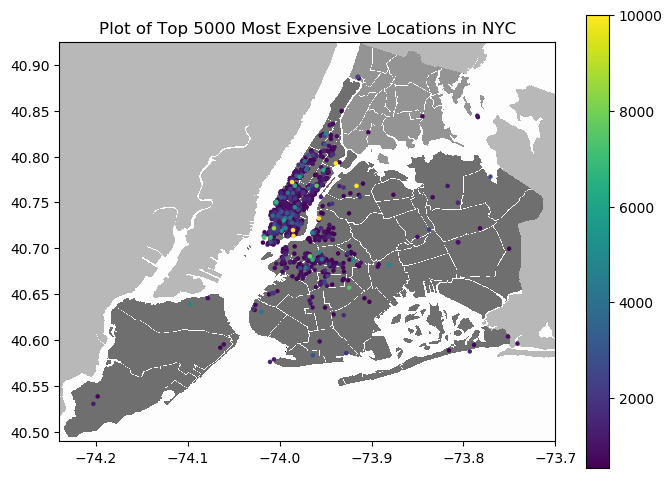

In [21]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/new-york-city-airbnb-open-data/New_York_City_.png', 0)
plt.imshow(img, zorder=0,extent=[-74.24, -73.7, 40.49,40.925])

# Let's take the top 1000 most popular listings

top_1000 = data.sort_values('price')[-1000:]

plt.scatter(top_1000['longitude'], top_1000['latitude'], c = top_1000['price'], s = 5)
plt.title("Plot of Top 5000 Most Expensive Locations in NYC")
plt.colorbar()
plt.show()

What do we know right now?

1. Postings in Manhattan are more expensive
2. The majority of postings are split between Brooklyn and Manhattan --> these are the most popular destinations to stay.
3. Manhattan also has the most postings with no reviews --> too many hosts with too few bookers OR there are few locations that are extremely popular that get all the customers. There is a similar case with Brooklyn.

## Popularity Analysis

Let's look into what types of trends exist in popularity, which I'm defining as number of reviews and reviews per month

In [22]:
data.sort_values('number_of_reviews')[-10:]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


Looks like a lot of the most popular listings are near the airport. This is really interesting but makes sense, since, a lot of people maybe have a flight cancelled or have a layover and they need a place to stay. Airport hotels tend to be quite expensive since demand is pretty inelastic. These airport listings on the other hand are quite reasonably priced ~$50 from this cursory glance

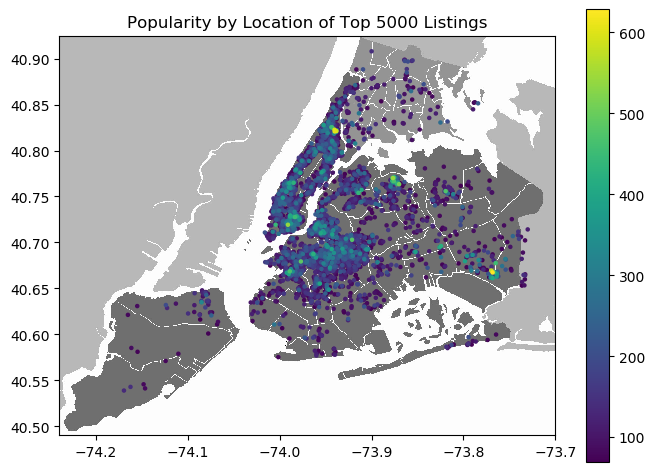

In [23]:
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/new-york-city-airbnb-open-data/New_York_City_.png', 0)
plt.imshow(img, zorder=0,extent=[-74.24, -73.7, 40.49,40.925])

# Let's take the top 1000 most popular listings

top_5000 = data.sort_values('number_of_reviews')[-5000:]

plt.scatter(top_5000['longitude'], top_5000['latitude'], c = top_5000['number_of_reviews'], s = 5)
plt.title("Popularity by Location of Top 5000 Listings")
plt.colorbar()
plt.show()

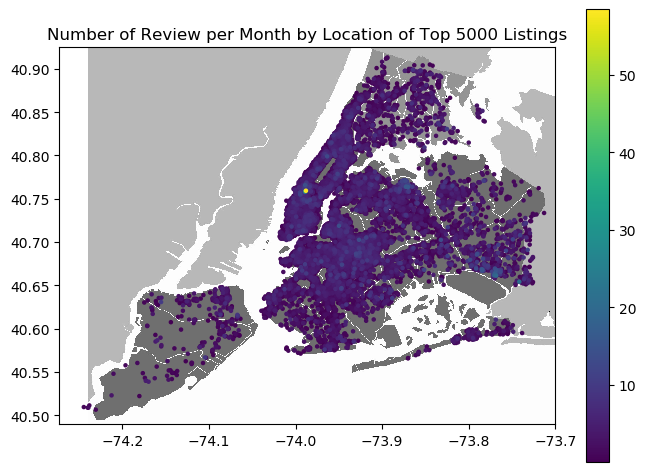

In [24]:
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/new-york-city-airbnb-open-data/New_York_City_.png', 0)
plt.imshow(img, zorder=0,extent=[-74.24, -73.7, 40.49,40.925])

# Let's take the out top 1000 most popular listings

top100 = data.sort_values('reviews_per_month')[:-100]

plt.scatter(top100['longitude'], top100['latitude'], c = top100['reviews_per_month'], s = 5)
plt.title("Number of Review per Month by Location of Top 5000 Listings")
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Number of Reviews Distribution by Neighbourhood')

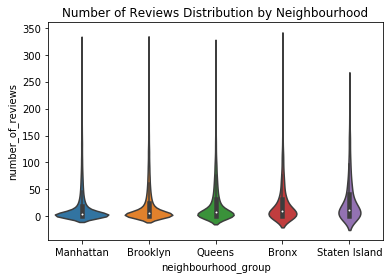

In [25]:
trimmed_reviews = data.sort_values('number_of_reviews')[:-100]

ax = sns.violinplot(x="neighbourhood_group", y="number_of_reviews", data=trimmed_reviews, order = neighbourhood_order)
ax.set_title("Number of Reviews Distribution by Neighbourhood")

It looks like Staten Island actually has the highest average number of reviews with the lowest distribution. This is likely because there are ton of hostings in Manhattan/Brooklyn that aren't being stayed in, which means their average number of reviews is fairly low.

Text(0.5, 1.0, 'Number of Reviews Distribution by Neighbourhood')

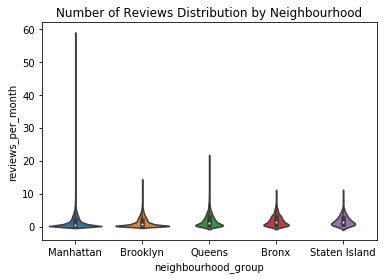

In [26]:
trimmed_reviews = data.sort_values('reviews_per_month')[:-100]

ax = sns.violinplot(x="neighbourhood_group", y="reviews_per_month", data=trimmed_reviews, order = neighbourhood_order)
ax.set_title("Number of Reviews Distribution by Neighbourhood")

Again, it looks like Manhattan and Brooklyn have a lot of listings that get no reviews whereas Queens, Bronx, Staten Island get a consistent number of stays.

What do we know now?

1. Manhattan listings are very popular, but there are more listings than there are bookers. Supply of Listings > Demand of Listings, so there are many properties that have no reviews. This also reflected in Brooklyn
2. Staten Island and Bronx have a suprisingly high average number of reviews, since there are likely much fewer properties but they experience a more consistent demand relative to their level of supply

### Dealing with NAs

Let's take away the listings that never go booked, or at least have no reviews. This should give us a better glance at the relationship with price and popularity

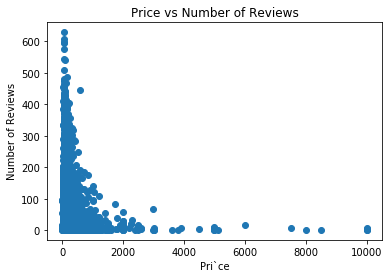

In [27]:
reviewed = data[data['last_review'].isna() != True]

plt.scatter(reviewed['price'], reviewed['number_of_reviews'])
plt.xlabel("Pri`ce")
plt.ylabel("Number of Reviews")
plt.title("Price vs Number of Reviews")
plt.show()

In [28]:
reviewed.groupby('neighbourhood_group').mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,2.145803e+07,1.007616e+08,40.848306,-73.883928,79.553653,3.932648,32.386986,1.837831,2.204338,170.940639
Brooklyn,1.753871e+07,5.469297e+07,40.684795,-73.951023,121.448714,5.320788,29.584362,1.283212,2.233052,105.879309
Manhattan,1.767480e+07,6.326809e+07,40.765973,-73.973902,180.052489,7.010342,27.330988,1.272131,8.769360,109.322932
Queens,2.078808e+07,9.282430e+07,40.731389,-73.871185,95.762571,4.221032,34.313511,1.941200,3.354394,150.508308
Staten Island,2.105923e+07,9.740580e+07,40.611207,-74.104838,89.964968,3.420382,36.754777,1.872580,2.388535,205.640127


This evens out some of the data. Manhattan's average price has gone down and number of reviews has gone up. This tells me that the listings that aren't getting traffic in Manhattan are just too expensive.

### Name Text Analysis

Let's take a look at the impact that the length of title has on price or popularity

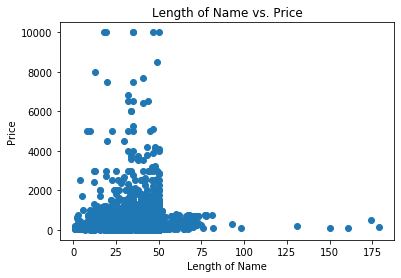

In [29]:
data['name_length'] = data['name'].str.len()

plt.scatter(data['name_length'], data['price'])
plt.title("Length of Name vs. Price")
plt.xlabel("Length of Name")
plt.ylabel("Price")
plt.show()

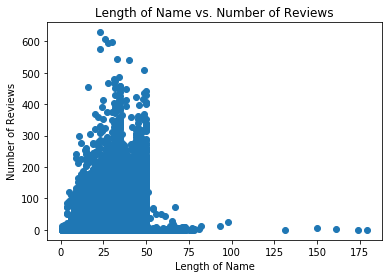

In [30]:
plt.scatter(data['name_length'], data['number_of_reviews'])
plt.title("Length of Name vs. Number of Reviews")
plt.xlabel("Length of Name")
plt.ylabel("Number of Reviews")
plt.show()

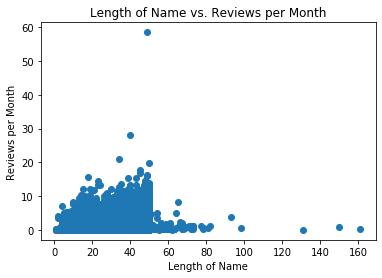

In [31]:
plt.scatter(data['name_length'], data['reviews_per_month'])
plt.title("Length of Name vs. Reviews per Month")
plt.xlabel("Length of Name")
plt.ylabel("Reviews per Month")
plt.show()

Looks like there's some sort of threshold at 50 characters. This is likely because this is the max number of characters that a listing can have. There seems to be a broadly upward trend, meaning that the longer the title, the more popular and expensive it can be.

Let's see if there are certain key words that lead to greater popularity.

In [32]:
pd.options.mode.chained_assignment = None
name_cleaned = data.loc[data['name'].isna() != True]

name_cleaned['name'] = name_cleaned['name'].apply(lambda x: " ".join(x.lower() for x in x.split()))
name_cleaned['name'] = name_cleaned['name'].str.replace('[^\w\s]','')
print(name_cleaned['name'][:10])

0                 clean  quiet apt home by the park
1                             skylit midtown castle
2                    the village of harlemnew york 
3                   cozy entire floor of brownstone
4    entire apt spacious studioloft by central park
5         large cozy 1 br apartment in midtown east
6                                    blissartsspace
7                    large furnished room near bway
8                 cozy clean guest room  family apt
9                 cute  cozy lower east side 1 bdrm
Name: name, dtype: object


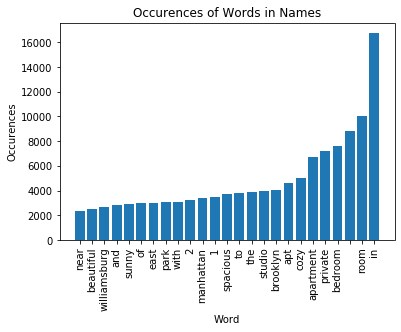

In [70]:
from collections import Counter
result = Counter(" ".join(name_cleaned['name'].values.tolist()).split(" "))
result = pd.DataFrame(list(result.items()), columns=['word', 'occurences'])

top_25 = result.sort_values('occurences')[-25:]
plt.bar(top_25['word'], top_25['occurences'])
plt.title('Occurences of Words in Names')
plt.xlabel('Word')
plt.ylabel('Occurences')
plt.xticks(rotation=90)
plt.show()

Let's repeat above but with only the most popular properties.

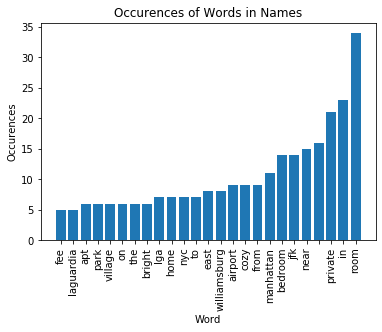

In [73]:
top1000 = name_cleaned.sort_values('number_of_reviews')[-100:]
result = Counter(" ".join(top1000['name'].values.tolist()).split(" "))
result = pd.DataFrame(list(result.items()), columns=['word', 'occurences'])

top_25 = result.sort_values('occurences')[-25:]
plt.bar(top_25['word'], top_25['occurences'])
plt.title('Occurences of Words in Names')
plt.xlabel('Word')
plt.ylabel('Occurences')
plt.xticks(rotation=90)
plt.show()

Looks like the most popular rooms are near the airport.

Let's repeat now with the most expensive.

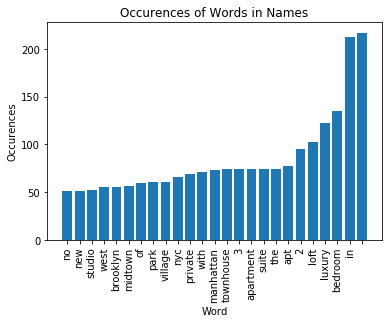

In [75]:
top1000 = name_cleaned.sort_values('price')[-1000:]
result = Counter(" ".join(top1000['name'].values.tolist()).split(" "))
result = pd.DataFrame(list(result.items()), columns=['word', 'occurences'])

top_25 = result.sort_values('occurences')[-25:]
plt.bar(top_25['word'], top_25['occurences'])
plt.title('Occurences of Words in Names')
plt.xlabel('Word')
plt.ylabel('Occurences')
plt.xticks(rotation=90)
plt.show()

So 'luxury' and 'townhouse' seem to be keyboards to indicate expensive. It also looks like 'Manhattan', 'Village'(presumably East and West Village), and also Midtown are key words.

## Conclusions

Manhattan and Brooklyn have too many Airbnb options at too high a price. It looks like bookers are forgoing Manhattan and Brooklyn in favor of cheaper alternatives. This phenomenon is less present in Brooklyn than in Manhattan - many people visiting New York may be actually staying in Brooklyn instead of Manhattan because it's cheaper.

### What can be done?

1. Increase traffic into Manhattan. There are a TON of Manhattan listings that tend to be higher priced. Shifting higher demand into Manhattan will increase revenue for Airbnb, and occupy many of the unoccupied listings.
    - This can be done in a few ways. One is adjusting the recommendation system such that when people search for New York listings, Manhattan ones are higher up. However, it should be kept in mind this shouldn't be done excessively, it's still important not to do burden properties in Brooklyn/Queens, etc especially when the booker is looking to stay in those areas.
    - Another option is to recommend experiences on top of the listing in Manhattan. The idea is that these experiences can help convince bookers to stay in Manhattan to a have a fuller New York experience.
    - Last option that I have in mind is to have recommendations to adjust the wording of people's properties like maybe encouraging a longer title or using keywords that might allow for a higher price

### Next Steps

This is a really rich dataset with tons of possible applications. I've only done a cursory analysis of the data but I think in the future I would want to work on.

1. Creating a model to predict price and popularity. This will help with determining which ones are undervalued or overvalued. This information can be used to give potentially give suggestions to hosts on pricing strategies to increase the success of their property.
2. NLP on the names, see if we can construct an optimal title for a given location that will maximize its success and popularity.
3. Create a model to predict which hosts are "super hosts", those whose properties are extremely popular and successful. By knowing which attributes are strong indicators of becoming a super host, Airbnb can target these hosts and encourage them to reach their full potential.